#### Feature Engineering:-
1. Feature Transformation
- A. Feature Scaling
- B. Feature Encoding

#### Data
- A. Numeric >>> Feature Scaling
- Continues
- Descrete
- 
- B. Categorical - Mostly in alphabetical/string >>> Feature Encoding
- Nominal - State Names, Branch
- Ordinal - Review(Excellent, Good, Bad)
- .
- Since ML Algorithms expect the data to be in Numerical format, it is required to convert Categorical data into Numbers.
- There are multiple ways to convert the categorical data to numeric.

### Feature Encoding - Categorical Data

#### Types of Encoding
- Ordinal Encoding - on Ordinal data (Specifically on input (X) columns)
- One hot Encoding - on Nominal data
- .
- Label Encoding. Specifically designed for Output labels(Y). It works siimlar to Ordinal encoding, but used when
  1. Any one of the input columns (X) is Ordinal column >>> We apply Ordinal encoding on that column in X.
  2. Output/Label (Y) columns is Categorical >>> We do not apply Ordinal encoding on Y, but in this case, we apply Label encoding on Y.

### Ordinal Encoding, along with Label Encoding example

In [356]:
import pandas as pd
Customer_DF = pd.read_csv(r"C:\Users\ACER\Desktop\Kranthi\DataScience_Desktop\MachineLearningFiles\customer.csv")
Customer_DF.head(5)

,age,gender,review,education,purchased
0,30,Female,Average,School,No
1,68,Female,Poor,UG,No
2,70,Female,Good,PG,No
3,72,Female,Good,PG,No
4,16,Female,Average,UG,No


In [358]:
print(Customer_DF.gender.value_counts())
print(Customer_DF.review.value_counts())
print(Customer_DF.education.value_counts())
print(Customer_DF.purchased.value_counts())

gender
Female    29
Male      21
Name: count, dtype: int64
review
Poor       18
Good       18
Average    14
Name: count, dtype: int64
education
PG        18
School    16
UG        16
Name: count, dtype: int64
purchased
No     26
Yes    24
Name: count, dtype: int64


In [360]:
# Here, 
# Input, Independent Variables, X = Age(Numerical) and Gender(Nominal), Review(Ordinal), Education(Ordinal) are categorical columns
# Output, dependent variable, Y = Purchased(Nominal)

# Encoders to be applied on 
# X = Age(Numerical - nothing as numerical) and 
# Gender(Nominal - OneHot Encoder), Review(Ordinal - Ordinal encdoder), Education(Ordinal - Ordinal encdoder) are categorical columns
# Output, dependent variable, Y = Purchased(Nominal) > But we apply here Label Encoding

# Two ways to do encoding here
# On X, separate Gender and apply OneHot encoder, and Separate Review and Education into one and apply Ordinal encoder.
# On Y, apply Label encoder.
# Or
# We can do it all in one step by using Column Transformer

In [362]:
# For this example, we are ignoring the Age and Gender columns, consider only Review, Education and Purchased columns
# Apply Ordinal Encoding on Review and Education Columns.
# Apply Label Encoding on Purchased Column.

Customer_DF_Final = Customer_DF[['review','education','purchased']]
Customer_DF_Final.head(5)

,review,education,purchased
0,Average,School,No
1,Poor,UG,No
2,Good,PG,No
3,Good,PG,No
4,Average,UG,No


In [364]:
# Prepare the data

from sklearn.model_selection import train_test_split
#x_train, x_test, y_train, y_test = train_test_split(Customer_DF_Final[['review','education']],Customer_DF_Final.purchased)
x_train, x_test, y_train, y_test = train_test_split(Customer_DF_Final.iloc[:,0:2],Customer_DF_Final.iloc[:,2:],test_size=0.2)

### OrdinalEncoder - For Ordinal Data in review and education columns.

In [367]:
# Now start with encoding the input (X) columns
import numpy as np
from sklearn.preprocessing import OrdinalEncoder

# Create OrdinalEncoder object and specify the categories as per the columns in X and their respective order
OrdinalEncoder_Obj = OrdinalEncoder(categories=[['Poor','Average','Good'],['School','UG','PG']],dtype=np.int32)

# Train as pet the Categories
OrdinalEncoder_Obj.fit(x_train)

OrdinalEncoder(categories=[['Poor', 'Average', 'Good'], ['School', 'UG', 'PG']],
               dtype=<class 'numpy.int32'>)

In [369]:
# Encode the data

x_train_encoded = OrdinalEncoder_Obj.transform(x_train)
x_test_encoded = OrdinalEncoder_Obj.transform(x_test)
# Above encode, converts the data into numpy array

In [371]:
# Keep all the columns side by side

x_original_transformed = x_train.copy()
x_original_transformed['Review_Encoded'] = x_train_encoded[:,0]
x_original_transformed['Education_Encoded'] = x_train_encoded[:,1]
#x_train_encoded

In [373]:
x_original_transformed.head(2)

,review,education,Review_Encoded,Education_Encoded
24,Average,PG,1,2
47,Good,PG,2,2


In [375]:
# To check the given Categories and their ordial values in hirearchy order while creating the object

OrdinalEncoder_Obj.categories

[['Poor', 'Average', 'Good'], ['School', 'UG', 'PG']]

### LabelEncoder - For Output column

In [378]:
# Now encode the Output (Y) column, here we are doing Label Encoding

from sklearn.preprocessing import LabelEncoder

# Create object for LabelEncoder
# Note: We are not giving the order here as the output column is Categorial - Nominal (Yes or No)
LabelEncoder_Obj = LabelEncoder()

In [380]:
# Train with the Y Train data

y_train_encoded = LabelEncoder_Obj.fit_transform(y_train)
y_test_encoded = LabelEncoder_Obj.transform(y_test)
y_train_encoded

C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


array([1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0])

In [386]:
# Keep all the columns side by side

y_original_transformed = y_train.copy()
y_original_transformed['Purchased_Encoded'] = y_train_encoded
y_original_transformed.head(5)

,purchased,Purchased_Encoded
24,Yes,1
47,Yes,1
33,Yes,1
21,No,0
25,No,0


In [384]:
# To check the given numbers by the algorithm in the background

LabelEncoder_Obj.classes_

array(['No', 'Yes'], dtype=object)

### OneHot Encoding - Nominal Categorical Data

- Each value in X (here X is Input - Categorical - Nominal, Y is Target - Numerical) is converted as shown in below diagram.

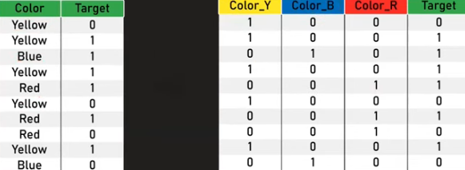
- In above diagram, Color_Y, Color_B, Color_R are called as dummy variable.
- .
- <b>Dummy Variable Trap</b>
- Remove any one of the columns from Color_Y, Color_B, Color_R
- Dummy Variable Trap - Leads to Multicollinearity - a situation where two or more independent variables in a model are highly correlated, meaning they are not truly independent of each other. This correlation can lead to unstable and unreliable model estimations, making it difficult to interpret the individual effects of each variable
- Dummy Variable Trap - This is also to reduce the number of columns created while OneHot Coding
- Ex: Color_Y = 0, Color_B = 0, Color_R = 1>>> Means Color is Red
- This is same as mentioning in two columnns Color_Y = 0, Color_B = 0 >>> It automatically means Color is Red

In [398]:
import pandas as pd

Cars_DF = pd.read_csv(r"C:\Users\ACER\Desktop\Kranthi\DataScience_Desktop\MachineLearningFiles\cars.csv")
Cars_DF.head(5)

,brand,km_driven,fuel,owner,selling_price
0,Maruti,145500,Diesel,First Owner,450000
1,Skoda,120000,Diesel,Second Owner,370000
2,Honda,140000,Petrol,Third Owner,158000
3,Hyundai,127000,Diesel,First Owner,225000
4,Maruti,120000,Petrol,First Owner,130000


In [400]:
#print("Total number of categories in Brand ",len(Cars_DF.brand.value_counts()))
# OR
print("Total number of categories in Brand ",Cars_DF.brand.nunique())
print("Category wise counts ",Cars_DF.brand.value_counts())
print("Total number of categories in Fuel ",Cars_DF.fuel.value_counts())
print("Total number of categories in Owner ",Cars_DF.owner.value_counts())

Total number of categories in Brand  32
Category wise counts  brand
Maruti           2448
Hyundai          1415
Mahindra          772
Tata              734
Toyota            488
Honda             467
Ford              397
Chevrolet         230
Renault           228
Volkswagen        186
BMW               120
Skoda             105
Nissan             81
Jaguar             71
Volvo              67
Datsun             65
Mercedes-Benz      54
Fiat               47
Audi               40
Lexus              34
Jeep               31
Mitsubishi         14
Force               6
Land                6
Isuzu               5
Kia                 4
Ambassador          4
Daewoo              3
MG                  3
Ashok               1
Opel                1
Peugeot             1
Name: count, dtype: int64
Total number of categories in Fuel  fuel
Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: count, dtype: int64
Total number of categories in Owner  owner
First Owner             5289
Sec

In [402]:
# Since we have 32 different brand values in Brand column, we have to create 32-1 = 31 different dummy variable to 
# identify each one as per OneHot Encoding.

# Instead, we will try to find out the brands that are most popular(occuring more time) as make dummy variable and put all the least
# occuring brands into one single dummy variable(Others)
# This is to reduce the dimensionality of the dataset.

# We have other categorical columns as well, like Fuel and Owner, since the categories are less, we can directly encode them.

### OneHot Encoding using Pandas

In [405]:
# First let us keep brand aside as it has more categories, let us encode only fuel and owner
# get_dummies is used to create OneHotEncoding

pd.get_dummies(Cars_DF, columns=['fuel','owner'])
# Once this is done, we will have fuel(4) and owner(5), we will totally have 
# 3(original columns brand, km_driven, selling_price) + 4(dummy cols from fuel) + 5(dummy cols from owner) columns in the dataframe.

,brand,km_driven,selling_price,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,Maruti,145500,450000,False,True,False,False,True,False,False,False,False
1,Skoda,120000,370000,False,True,False,False,False,False,True,False,False
2,Honda,140000,158000,False,False,False,True,False,False,False,False,True
3,Hyundai,127000,225000,False,True,False,False,True,False,False,False,False
4,Maruti,120000,130000,False,False,False,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai,110000,320000,False,False,False,True,True,False,False,False,False
8124,Hyundai,119000,135000,False,True,False,False,False,True,False,False,False
8125,Maruti,120000,382000,False,True,False,False,True,False,False,False,False
8126,Tata,25000,290000,False,True,False,False,True,False,False,False,False


In [407]:
# Confirm the number of columns after encoding fuel and owner
# We can notice that original data frame is not changed

Cars_DF.shape

(8128, 5)

### K-1 OneHot Encoding.

- In above encoding we have not addressed Multicollinearity, let us handle it now

In [409]:
pd.get_dummies(Cars_DF, columns=['fuel','owner'],drop_first = True)

,brand,km_driven,selling_price,fuel_Diesel,fuel_LPG,fuel_Petrol,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,Maruti,145500,450000,True,False,False,False,False,False,False
1,Skoda,120000,370000,True,False,False,False,True,False,False
2,Honda,140000,158000,False,False,True,False,False,False,True
3,Hyundai,127000,225000,True,False,False,False,False,False,False
4,Maruti,120000,130000,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai,110000,320000,False,False,True,False,False,False,False
8124,Hyundai,119000,135000,True,False,False,True,False,False,False
8125,Maruti,120000,382000,True,False,False,False,False,False,False
8126,Tata,25000,290000,True,False,False,False,False,False,False


In [411]:
# Even though OneHot Encoding and K-1 OneHot Encoding are possible through Pandas, it does not remember the columns or 
# will generate the encoding in a totally different way.
# For Machine Learning algorithms, we always use OneHot encoding through scikit (sklearn) library OneHotEncoder.

### OneHot Encoding using scikit (sklearn) library OneHotEncoder.
### K-1 OneHot Encoding using scikit (sklearn) library OneHotEncoder 
- Just one change while creating object for K-1 OneHot Encoding
- Syntax:-
- OneHotEncoder_Obj = OneHotEncoder() > Converts all the columns
- OneHotEncoder_Obj = OneHotEncoder(drop=First) > for K-1 OneHot Encoding, excludes the first column while creating dummy variables.

In [414]:
Cars_DF.head(5)

,brand,km_driven,fuel,owner,selling_price
0,Maruti,145500,Diesel,First Owner,450000
1,Skoda,120000,Diesel,Second Owner,370000
2,Honda,140000,Petrol,Third Owner,158000
3,Hyundai,127000,Diesel,First Owner,225000
4,Maruti,120000,Petrol,First Owner,130000


In [416]:
# Prepare the data

from sklearn.model_selection import train_test_split

#x_train, x_test, y_train, y_test = train_test_split(Cars_DF[['brand','km_driven','fuel','owner']],Cars_DF.selling_price)
# OR
#x_train, x_test, y_train, y_test = train_test_split(Cars_DF.iloc[:,0:4],Cars_DF.iloc[:,4:])
# Above two are similar, but should always be created in below manner, above manner creates both x and y in 2D.

#x_train, x_test, y_train, y_test = train_test_split(Cars_DF[['brand','km_driven','fuel','owner']],Cars_DF.selling_price)
# OR
x_train, x_test, y_train, y_test = train_test_split(Cars_DF.iloc[:,0:4],Cars_DF.iloc[:,-1])

In [418]:
x_train

,brand,km_driven,fuel,owner
6237,Chevrolet,110000,Diesel,Second Owner
6705,Honda,7032,Petrol,First Owner
5855,Hyundai,100000,Petrol,Second Owner
3431,Maruti,18000,Petrol,First Owner
7423,Maruti,110000,Diesel,Third Owner
...,...,...,...,...
2047,Hyundai,137000,CNG,First Owner
5757,Honda,70000,Petrol,First Owner
4463,Mahindra,120000,Diesel,First Owner
826,Hyundai,60000,Diesel,First Owner


In [420]:
y_train

6237     420000
6705     779000
5855     265000
3431     310000
7423     375000
         ...   
2047     127000
5757     240000
4463     650000
826     1050000
5198     300000
Name: selling_price, Length: 6096, dtype: int64

In [440]:
# First create OneHotEncoder class object

from sklearn.preprocessing import OneHotEncoder

# OneHotEncoder_Obj = OneHotEncoder() # Creates dummy for all the variables(Columns)
OneHotEncoder_Obj = OneHotEncoder(drop='first') 
# OneHotEncoder_Obj = OneHotEncoder(drop='first',sparse=False,dtype=np.int32)
# drop='first' >>> Creates K-1 dummy variables - To address Multicollinearity
# sparse_output=False >>> Then we need not have to use toarry option as used below.
# dtype=np.int32 >>> by default, if we see below the values are encoded into float[0., 0., 1., ..., 0., 0., 1.], 
# if we use this, it converts to integers.

In [442]:
# Now encode the data only on Fuel and Owner
# We can also use Column transformer, but here we are using the lenghty way of doing it
# First transform only fuel and owner and then attach it to the main data.

# Transform and store the encoded data
x_train_encoded = OneHotEncoder_Obj.fit_transform(x_train[['fuel','owner']])
x_train_encoded
# 6096x9 - Once this is done, we will have fuel(4) and owner(5), we will totally have 9 columns for the transformed columns fuel and owner
# 6096x7 - If we use drop='First' while creating OneHotEncoder object  K-1 dummy columns/variables are created
# Once this is done, we will have fuel(3) and owner(4), we will totally have 7 columns for the transformed columns fuel and owner

<6096x7 sparse matrix of type '<class 'numpy.float64'>'
	with 8184 stored elements in Compressed Sparse Row format>

In [444]:
# To see those columns

#OneHotEncoder_Obj.fit_transform(x_train[['fuel','owner']]).toarray()
# OR
x_train_encoded.toarray() # Since we gave sparse=True, by default.
#x_train_encoded # This will be enough, if we give sparse_output = False

array([[1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 1., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [446]:
# Convert all the transformed (encoded) data to array

x_train_encoded = OneHotEncoder_Obj.fit_transform(x_train[['fuel','owner']]).toarray()
x_test_encoded = OneHotEncoder_Obj.transform(x_train[['fuel','owner']]).toarray()

In [448]:
# Now create a new dataframe with encoded columns for fuel and owner along with other columns brand and km_driven

x_train.head(3)

,brand,km_driven,fuel,owner
6237,Chevrolet,110000,Diesel,Second Owner
6705,Honda,7032,Petrol,First Owner
5855,Hyundai,100000,Petrol,Second Owner


In [450]:
# First take normal columns which are not encoded

x_train[['brand','km_driven']]

,brand,km_driven
6237,Chevrolet,110000
6705,Honda,7032
5855,Hyundai,100000
3431,Maruti,18000
7423,Maruti,110000
...,...,...
2047,Hyundai,137000
5757,Honda,70000
4463,Mahindra,120000
826,Hyundai,60000


In [452]:
# Get only the values

x_train[['brand','km_driven']].values
# We get numpy array

array([['Chevrolet', 110000],
       ['Honda', 7032],
       ['Hyundai', 100000],
       ...,
       ['Mahindra', 120000],
       ['Hyundai', 60000],
       ['Maruti', 90000]], dtype=object)

In [454]:
# Now check the encoded columns

x_train_encoded
# This is a nunmpy array
# Total of 9 columns, fuel(4) and owner(5)
# Total of 7 columns, fuel(3) and owner(4) for drop='first' option.

array([[1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 1., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [496]:
import numpy as np

# Horizaontally stack all the columns from x_train and x_train_encoded array
x_train_encoded = np.hstack((x_train[['brand','km_driven']].values,x_train_encoded))

In [498]:
# Check the number of columns

np.hstack((x_train[['brand','km_driven']].values,x_train_encoded)).shape
# Total of 11 columns, fuel(4) and owner(5) + bran and km_driven
# Total of 9 columns, fuel(3) and owner(4) + bran and km_driven

(6096, 13)

In [500]:
x_train_encoded_DF = pd.DataFrame(x_train_encoded)
x_train_encoded_DF

,0,1,2,3,4,5,6,7,8,9,10
0,Chevrolet,110000,Chevrolet,110000,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,Honda,7032,Honda,7032,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,Hyundai,100000,Hyundai,100000,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,Maruti,18000,Maruti,18000,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,Maruti,110000,Maruti,110000,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
6091,Hyundai,137000,Hyundai,137000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6092,Honda,70000,Honda,70000,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6093,Mahindra,120000,Mahindra,120000,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6094,Hyundai,60000,Hyundai,60000,1.0,0.0,0.0,0.0,0.0,0.0,0.0


### Now convert the top Category - brand which had many categories

In [503]:
Cars_DF['brand'].value_counts()
# Since there are 32 categories, let us take only those categories, where the total count is >100
# Keep the other categories into one column

brand
Maruti           2448
Hyundai          1415
Mahindra          772
Tata              734
Toyota            488
Honda             467
Ford              397
Chevrolet         230
Renault           228
Volkswagen        186
BMW               120
Skoda             105
Nissan             81
Jaguar             71
Volvo              67
Datsun             65
Mercedes-Benz      54
Fiat               47
Audi               40
Lexus              34
Jeep               31
Mitsubishi         14
Force               6
Land                6
Isuzu               5
Kia                 4
Ambassador          4
Daewoo              3
MG                  3
Ashok               1
Opel                1
Peugeot             1
Name: count, dtype: int64

In [505]:
# Get the total number of unique categories.

Cars_DF['brand'].nunique()

32

In [507]:
# Create a variable to store the counts of each category

brand_counts = Cars_DF['brand'].value_counts()
brand_counts.head(5)

brand
Maruti      2448
Hyundai     1415
Mahindra     772
Tata         734
Toyota       488
Name: count, dtype: int64

In [509]:
# Get the list of all the brands whose categories count is less than or equal to 100

# Below returns all brands with True(Meaning count <= 100) and False(Meaning count > 100)
brand_counts <= 100

brand
Maruti           False
Hyundai          False
Mahindra         False
Tata             False
Toyota           False
Honda            False
Ford             False
Chevrolet        False
Renault          False
Volkswagen       False
BMW              False
Skoda            False
Nissan            True
Jaguar            True
Volvo             True
Datsun            True
Mercedes-Benz     True
Fiat              True
Audi              True
Lexus             True
Jeep              True
Mitsubishi        True
Force             True
Land              True
Isuzu             True
Kia               True
Ambassador        True
Daewoo            True
MG                True
Ashok             True
Opel              True
Peugeot           True
Name: count, dtype: bool

In [511]:
# Now get the brand and its count whose count is <= 100

brand_counts[brand_counts <= 100]

brand
Nissan           81
Jaguar           71
Volvo            67
Datsun           65
Mercedes-Benz    54
Fiat             47
Audi             40
Lexus            34
Jeep             31
Mitsubishi       14
Force             6
Land              6
Isuzu             5
Kia               4
Ambassador        4
Daewoo            3
MG                3
Ashok             1
Opel              1
Peugeot           1
Name: count, dtype: int64

In [513]:
brand_counts[brand_counts <= 100].values

array([81, 71, 67, 65, 54, 47, 40, 34, 31, 14,  6,  6,  5,  4,  4,  3,  3,
        1,  1,  1], dtype=int64)

In [515]:
brand_counts[brand_counts <= 100].index

Index(['Nissan', 'Jaguar', 'Volvo', 'Datsun', 'Mercedes-Benz', 'Fiat', 'Audi',
       'Lexus', 'Jeep', 'Mitsubishi', 'Force', 'Land', 'Isuzu', 'Kia',
       'Ambassador', 'Daewoo', 'MG', 'Ashok', 'Opel', 'Peugeot'],
      dtype='object', name='brand')

In [517]:
# Store those brand names 

Replace_Brands = brand_counts[brand_counts <= 100].index

In [519]:
type(Replace_Brands)

pandas.core.indexes.base.Index

In [521]:
# Using Pandas encode the brand column
# get_dummies is used to create OneHotEncoding using Pandas

pd.get_dummies(Cars_DF['brand'])
# But this will create dummies for all the 32 categories.

,Ambassador,Ashok,Audi,BMW,Chevrolet,Daewoo,Datsun,Fiat,Force,Ford,...,Mitsubishi,Nissan,Opel,Peugeot,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8124,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8125,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8126,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [523]:
# To create dummy for most common and the uncommn one, use below syntax.

pd.get_dummies(Cars_DF['brand'].replace(Replace_Brands,'Dummy'))
# This code first will replace all the brands that are present in Replace_Brands with Dummy and then do dummy variables

,BMW,Chevrolet,Dummy,Ford,Honda,Hyundai,Mahindra,Maruti,Renault,Skoda,Tata,Toyota,Volkswagen
0,False,False,False,False,False,False,False,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,False,False,False
2,False,False,False,False,True,False,False,False,False,False,False,False,False
3,False,False,False,False,False,True,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,False,False,False,False,False,True,False,False,False,False,False,False,False
8124,False,False,False,False,False,True,False,False,False,False,False,False,False
8125,False,False,False,False,False,False,False,True,False,False,False,False,False
8126,False,False,False,False,False,False,False,False,False,False,True,False,False


### Instead of doing multiple steps to encode different data in multiple steps, use column transformer

### More examples from class on OrdinalEncoder, LabelEncoder, OneHotEncoder

In [998]:
import pandas as pd

Customers_DF = pd.read_csv(r"C:\Users\ACER\Desktop\Kranthi\DataScience_Desktop\MachineLearningFiles\customer.csv")
Customers_DF.head(2)

,age,gender,review,education,purchased
0,30,Female,Average,School,No
1,68,Female,Poor,UG,No


In [1000]:
Customers_DF_REP = Customers_DF[['review','education','purchased']]

In [1002]:
x = Customers_DF_REP[['review','education']]
y = Customers_DF_REP['purchased']

In [1004]:
Customers_DF_REP.education.value_counts()

education
PG        18
School    16
UG        16
Name: count, dtype: int64

In [1006]:
Customers_DF_REP.review.value_counts()

review
Poor       18
Good       18
Average    14
Name: count, dtype: int64

In [1008]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y)

#### Ordinal Encoding

In [1011]:
from sklearn.preprocessing import OrdinalEncoder

OrdinalEncoderObj = OrdinalEncoder(categories=[['Poor','Average','Good'],['School','UG','PG']])
OrdinalEncoderObj.fit(x_train)
x_train_encoded = OrdinalEncoderObj.transform(x_train)
x_test_encoded = OrdinalEncoderObj.transform(x_test)
x_train_encoded[:2]

array([[0., 0.],
       [1., 1.]])

In [1013]:
# To check the given Categories and their ordial values in hirearchy order while creating the object

OrdinalEncoderObj.categories

[['Poor', 'Average', 'Good'], ['School', 'UG', 'PG']]

In [1015]:
# Create a copy x_train, original data

x_train_both = x_train.copy()
x_train_both.head(3)

,review,education
35,Poor,School
44,Average,UG
49,Good,UG


In [1017]:
# Add new columns with encoded values

x_train_both['Review_Encoded'] =  x_train_encoded[:,0]
x_train_both['Education_Encoded'] =  x_train_encoded[:,1]

In [1019]:
# Display all the columns before and after encoding

x_train_both.head(3)
# School UG PG
# Poor Avg Good

,review,education,Review_Encoded,Education_Encoded
35,Poor,School,0.0,0.0
44,Average,UG,1.0,1.0
49,Good,UG,2.0,1.0


In [1021]:
# Final x_train data to be used for model

x_train_encoded = x_train_both[['Review_Encoded','Education_Encoded']]

In [1023]:
x_train_encoded.head(3)

,Review_Encoded,Education_Encoded
35,0.0,0.0
44,1.0,1.0
49,2.0,1.0


#### Label Encoding
- To encode output/label column to numeric

In [1042]:
y_train.head(2)

35    Yes
44     No
Name: purchased, dtype: object

In [1044]:
from sklearn.preprocessing import LabelEncoder

LabelEncoder_Obj = LabelEncoder()

In [1046]:
# Encode the y - target/label column

y_train_encoded = LabelEncoder_Obj.fit_transform(y_train)
y_test_encoded = LabelEncoder_Obj.transform(y_test)

In [1048]:
y_train.head(3)

35    Yes
44     No
49     No
Name: purchased, dtype: object

In [1079]:
y_train_encoded[0:3]

array([1, 0, 0])

#### One hot encoding on Categorical Data

In [1054]:
import pandas as pd

dfcars = pd.read_csv(r"C:\Users\ACER\Desktop\Kranthi\DataScience_Desktop\MachineLearningFiles\cars.csv")
dfcars.head(3)

,brand,km_driven,fuel,owner,selling_price
0,Maruti,145500,Diesel,First Owner,450000
1,Skoda,120000,Diesel,Second Owner,370000
2,Honda,140000,Petrol,Third Owner,158000


In [1056]:
dfcars_fos = dfcars[['owner','fuel','selling_price']]
dfcars_fos

,owner,fuel,selling_price
0,First Owner,Diesel,450000
1,Second Owner,Diesel,370000
2,Third Owner,Petrol,158000
3,First Owner,Diesel,225000
4,First Owner,Petrol,130000
...,...,...,...
8123,First Owner,Petrol,320000
8124,Fourth & Above Owner,Diesel,135000
8125,First Owner,Diesel,382000
8126,First Owner,Diesel,290000


In [1058]:
x_train, x_test, y_train, y_test = train_test_split(dfcars_fos[['owner','fuel']],dfcars_fos.selling_price)

In [1060]:
dfcars_fos.owner.value_counts()

owner
First Owner             5289
Second Owner            2105
Third Owner              555
Fourth & Above Owner     174
Test Drive Car             5
Name: count, dtype: int64

In [1062]:
dfcars_fos.fuel.value_counts()

fuel
Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: count, dtype: int64

In [1068]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(drop='first',sparse_output=False,dtype=np.int32)
#sparse_output=False >>> If we do not give this, it gives no output as most of the values are 0 and it removes it

In [1070]:
x_train_ohe = ohe.fit_transform(x_train)

In [1072]:
x_test_ohe = ohe.transform(x_test)

In [1082]:
x_train

,owner,fuel
6616,First Owner,Petrol
6017,First Owner,Petrol
1858,First Owner,Petrol
411,First Owner,Diesel
6459,First Owner,Petrol
...,...,...
6716,Second Owner,Petrol
3260,First Owner,Diesel
6932,Second Owner,Diesel
565,First Owner,Diesel


In [1084]:
x_train_ohe[0:1]

array([[0, 0, 0, 0, 0, 0, 1]])